In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score, f1_score

from sklearn.pipeline import Pipeline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/Manufacturing.csv"

In [7]:
df = pd.read_csv(path)

In [8]:
df.head()

,ID,Timestamp,SensorReading,MachineStatus,QualityCheck,ProductCount
0,1,2023-11-22 9:24:29,43.081004,Standby,True,21
1,2,2023-11-21 9:24:29,71.312491,On,True,18
2,3,2023-11-20 9:24:29,19.096745,Standby,False,10
3,4,2023-11-19 9:24:29,28.951475,On,True,24
4,5,2023-11-18 9:24:29,46.283914,Standby,True,23


In [9]:
df.tail()

,ID,Timestamp,SensorReading,MachineStatus,QualityCheck,ProductCount
995,996,2021-03-02 9:24:29,38.546762,Off,False,22
996,997,2021-03-01 9:24:29,6.231278,On,False,24
997,998,2021-02-28 9:24:29,78.568037,On,False,26
998,999,2021-02-27 9:24:29,27.776515,Off,True,23
999,1000,2021-02-26 9:24:29,11.580693,Standby,True,25


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1000 non-null   int64  
 1   Timestamp      1000 non-null   object 
 2   SensorReading  1000 non-null   float64
 3   MachineStatus  1000 non-null   object 
 4   QualityCheck   1000 non-null   bool   
 5   ProductCount   1000 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 40.2+ KB


In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Timestamp,1000,1000,2021-02-26 9:24:29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SensorReading,1000.0,NaN,NaN,NaN,51.505139,29.07013,0.129532,26.942501,52.238379,76.446806,99.915899
MachineStatus,1000,3,Standby,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QualityCheck,1000,2,True,517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCount,1000.0,NaN,NaN,NaN,19.875,4.411444,7.0,17.0,20.0,23.0,33.0


In [12]:
df.dtypes

,0
ID,int64
Timestamp,object
SensorReading,float64
MachineStatus,object
QualityCheck,bool
ProductCount,int64


In [13]:
df.isnull().sum().sum()

np.int64(0)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.shape

(1000, 6)

In [16]:
df.columns

Index(['ID', 'Timestamp', 'SensorReading', 'MachineStatus', 'QualityCheck',
       'ProductCount'],
      dtype='object')

In [17]:
columns = ['MachineStatus', 'QualityCheck','ProductCount']

for i in columns:
  print(df[i].unique())

['Standby' 'On' 'Off']
[ True False]
[21 18 10 24 23 20 17 13 19 27 26 15 22 16 25 14 12 30 11 28 29  7 33  8
 31  9]


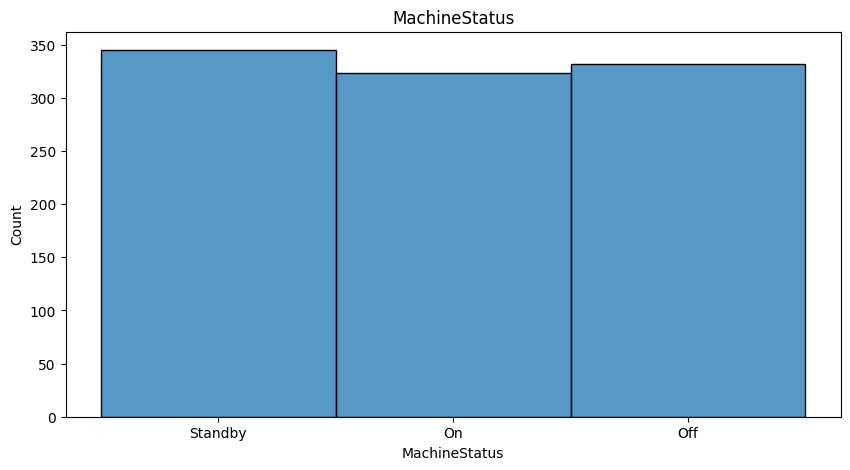

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df,x='MachineStatus')
plt.xlabel('MachineStatus')
plt.title('MachineStatus')
plt.show()

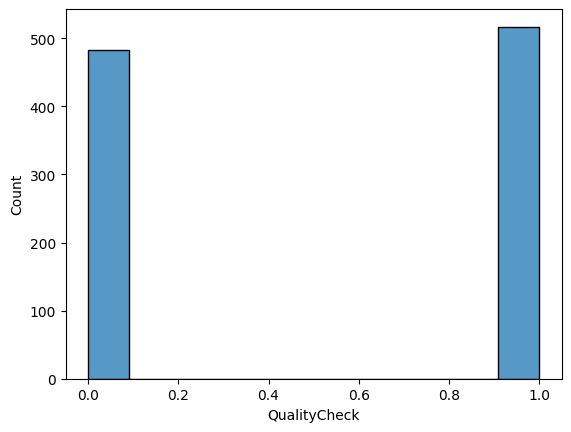

In [19]:
sns.histplot(df["QualityCheck"])
plt.show()

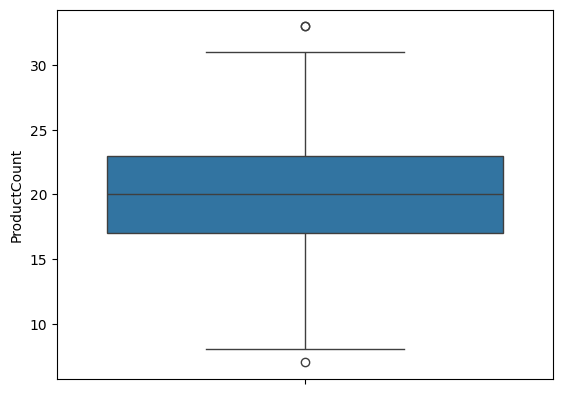

In [20]:
sns.boxplot(df["ProductCount"])
plt.show()

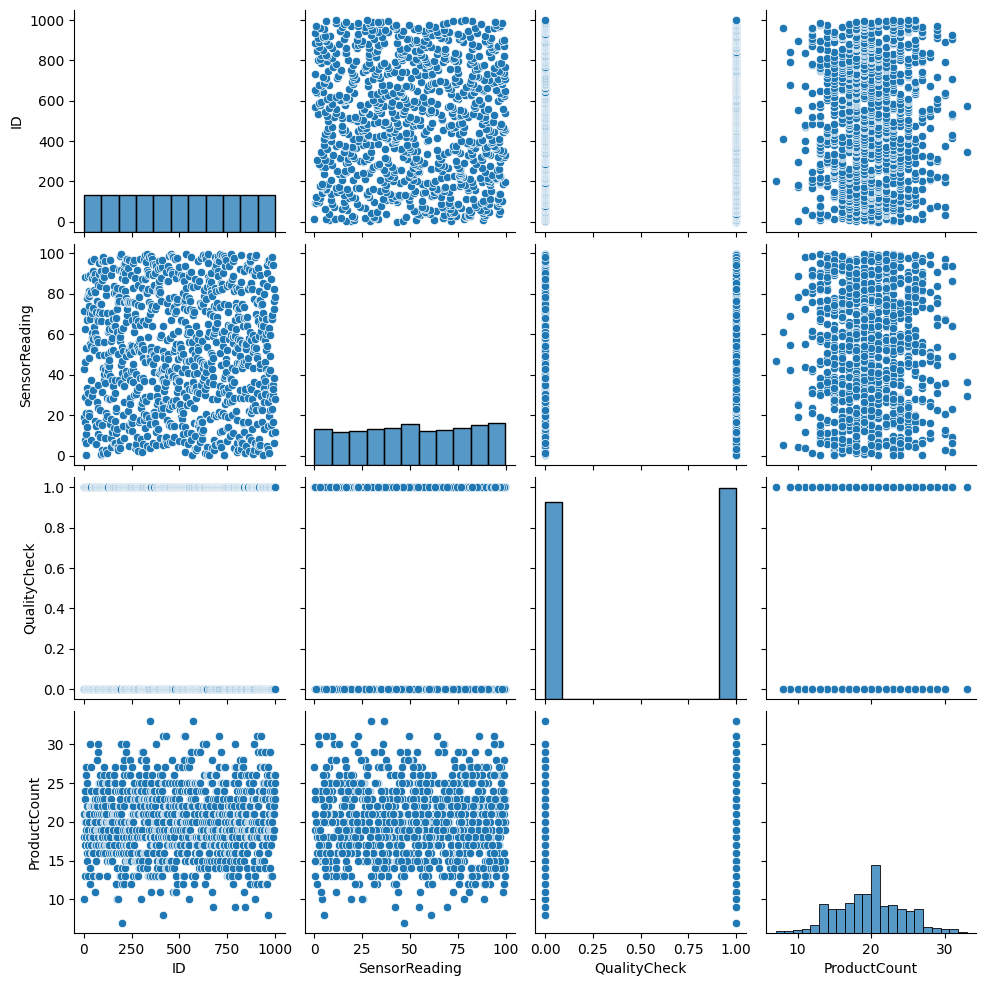

In [21]:
sns.pairplot(df)
plt.show()

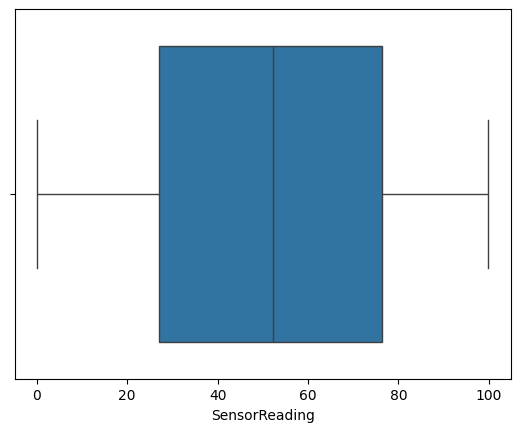

In [22]:
sns.boxplot(df,x="SensorReading")
plt.show()

In [23]:
num = df.select_dtypes(include=['int64','float64'])

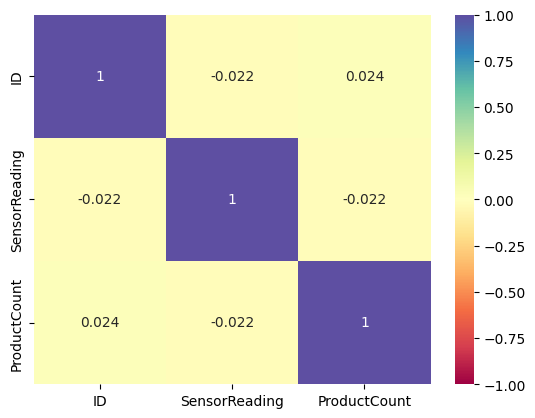

In [24]:
sns.heatmap(num.corr(),annot=True,vmax=1,vmin=-1,cmap="Spectral")
plt.show()

In [25]:
df1 = df.copy()

In [26]:
df1 = df1.drop(["ID"], axis=1)

In [27]:
df1.head()

,Timestamp,SensorReading,MachineStatus,QualityCheck,ProductCount
0,2023-11-22 9:24:29,43.081004,Standby,True,21
1,2023-11-21 9:24:29,71.312491,On,True,18
2,2023-11-20 9:24:29,19.096745,Standby,False,10
3,2023-11-19 9:24:29,28.951475,On,True,24
4,2023-11-18 9:24:29,46.283914,Standby,True,23


In [28]:
le = LabelEncoder()
for column in ["MachineStatus", "QualityCheck"]:
    df1[column] = le.fit_transform(df1[column])

In [29]:
df1.head(10)

,Timestamp,SensorReading,MachineStatus,QualityCheck,ProductCount
0,2023-11-22 9:24:29,43.081004,2,1,21
1,2023-11-21 9:24:29,71.312491,1,1,18
2,2023-11-20 9:24:29,19.096745,2,0,10
3,2023-11-19 9:24:29,28.951475,1,1,24
4,2023-11-18 9:24:29,46.283914,2,1,23
5,2023-11-17 9:24:29,16.650376,1,0,20
6,2023-11-16 9:24:29,62.516470,2,1,17
7,2023-11-15 9:24:29,7.724392,0,1,13
8,2023-11-14 9:24:29,88.271366,0,1,23
9,2023-11-13 9:24:29,53.349997,0,1,20


In [30]:
df1["Timestamp"] = pd.to_datetime(df1["Timestamp"])

In [31]:
df1['Hour'] = df1['Timestamp'].dt.hour
df1['Minute'] = df1['Timestamp'].dt.minute
df1['Second'] = df1['Timestamp'].dt.second
df1['Yearly'] = df1['Timestamp'].dt.dayofyear
df1['Day'] = df1['Timestamp'].dt.day
df1['Month'] = df1['Timestamp'].dt.month
df1['Year'] = df1['Timestamp'].dt.year
df1['Quarter'] = df1['Timestamp'].dt.quarter
df1['Halfly'] = df1['Timestamp'].dt.month.apply(lambda x: 1 if x < 7 else 2)

In [32]:
df1.tail(5)

,Timestamp,SensorReading,MachineStatus,QualityCheck,ProductCount,Hour,Minute,Second,Yearly,Day,Month,Year,Quarter,Halfly
995,2021-03-02 09:24:29,38.546762,0,0,22,9,24,29,61,2,3,2021,1,1
996,2021-03-01 09:24:29,6.231278,1,0,24,9,24,29,60,1,3,2021,1,1
997,2021-02-28 09:24:29,78.568037,1,0,26,9,24,29,59,28,2,2021,1,1
998,2021-02-27 09:24:29,27.776515,0,1,23,9,24,29,58,27,2,2021,1,1
999,2021-02-26 09:24:29,11.580693,2,1,25,9,24,29,57,26,2,2021,1,1


In [33]:
df1 = df1.drop('Timestamp',axis=1)

In [34]:
X = df1.drop('QualityCheck',axis=1)
y = df1['QualityCheck']


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

In [37]:
df1.dtypes

,0
SensorReading,float64
MachineStatus,int64
QualityCheck,int64
ProductCount,int64
Hour,int32
Minute,int32
Second,int32
Yearly,int32
Day,int32
Month,int32


In [38]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [39]:
y_pred = pipeline.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy: 0.515
Classification Report
              precision    recall  f1-score   support

           0       0.51      0.47      0.49        98
           1       0.52      0.56      0.54       102

    accuracy                           0.52       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.52      0.51       200



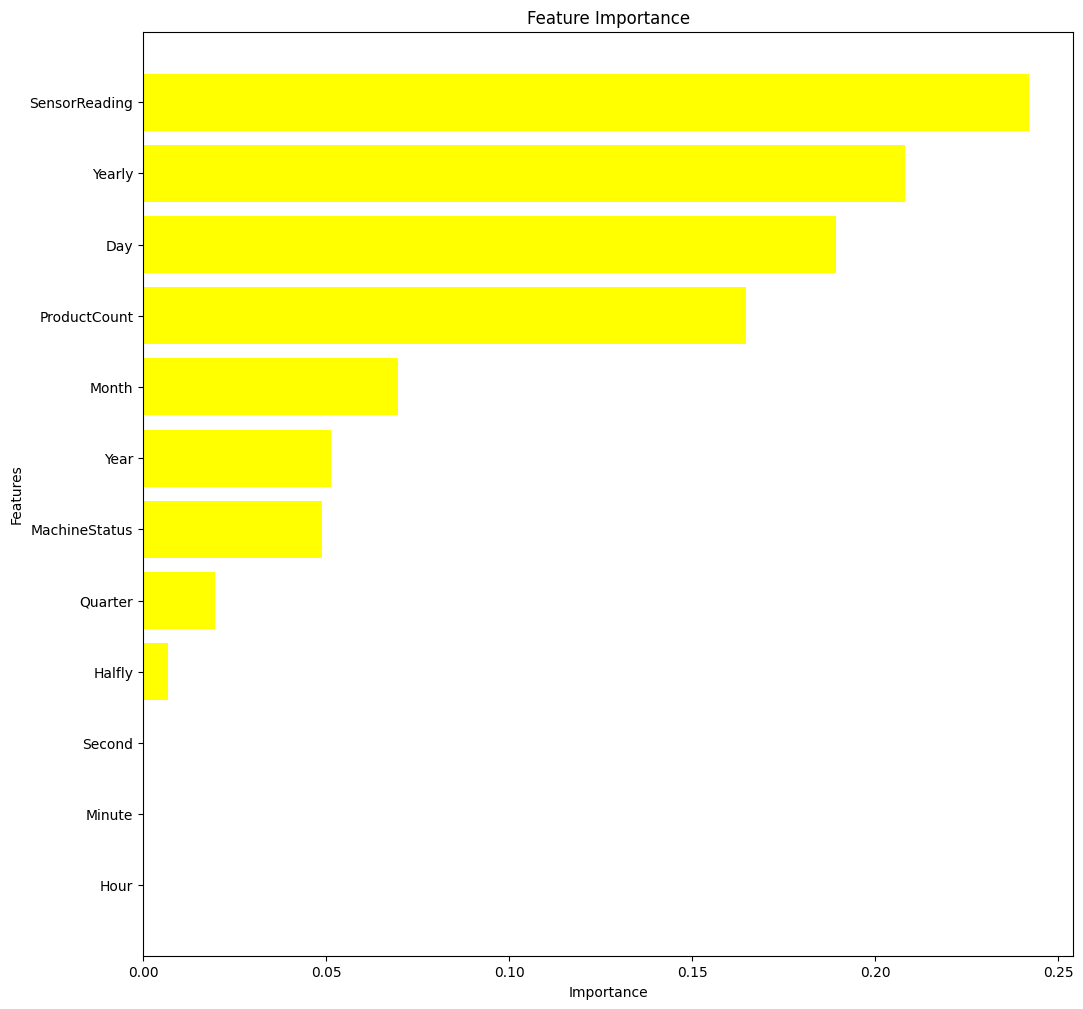

In [41]:
features_name = X_train.columns
importance = pipeline.named_steps['rf'].feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(12,12))
plt.barh(range(len(indices)),importance[indices],align='center',color="yellow")
plt.yticks(range(len(indices)),[features_name[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [67]:
para_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5,10,15,20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
}


In [68]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=para_grid, cv=3, scoring='accuracy',n_jobs=-1)

In [70]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 5, 10, 15, 20],
                         'rf__max_features': ['auto', 'sqrt', 'log2'],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [71]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report")
print(classification_report(y_test, y_pred))

Accuracy: 0.51
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.28      0.36        98
           1       0.51      0.74      0.60       102

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.48       200
weighted avg       0.51      0.51      0.48       200



In [75]:
train_accuracy = accuracy_score(y_train, grid_search.best_estimator_.predict(X_train))
train_precision = precision_score(y_train, grid_search.best_estimator_.predict(X_train)) # Changed y_test to y_train
train_recall = recall_score(y_train, grid_search.best_estimator_.predict(X_train)) # Changed y_test to y_train and y_pred to grid_search.best_estimator_.predict(X_train)
train_f1 = f1_score(y_train, grid_search.best_estimator_.predict(X_train)) # Changed y_test to y_train and y_pred to grid_search.best_estimator_.predict(X_train)
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)

Train Accuracy: 0.70625
Train Precision: 0.667910447761194
Train Recall: 0.8626506024096385
Train F1 Score: 0.7528916929547844


In [43]:
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(objective='binary:logistic'))
])

In [48]:
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [56]:
y_pred1 = pipeline1.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)
print("Classification Report")
print(classification_report(y_test, y_pred1))

Accuracy: 0.5
Classification Report
              precision    recall  f1-score   support

           0       0.49      0.49      0.49        98
           1       0.51      0.51      0.51       102

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.50      0.50       200



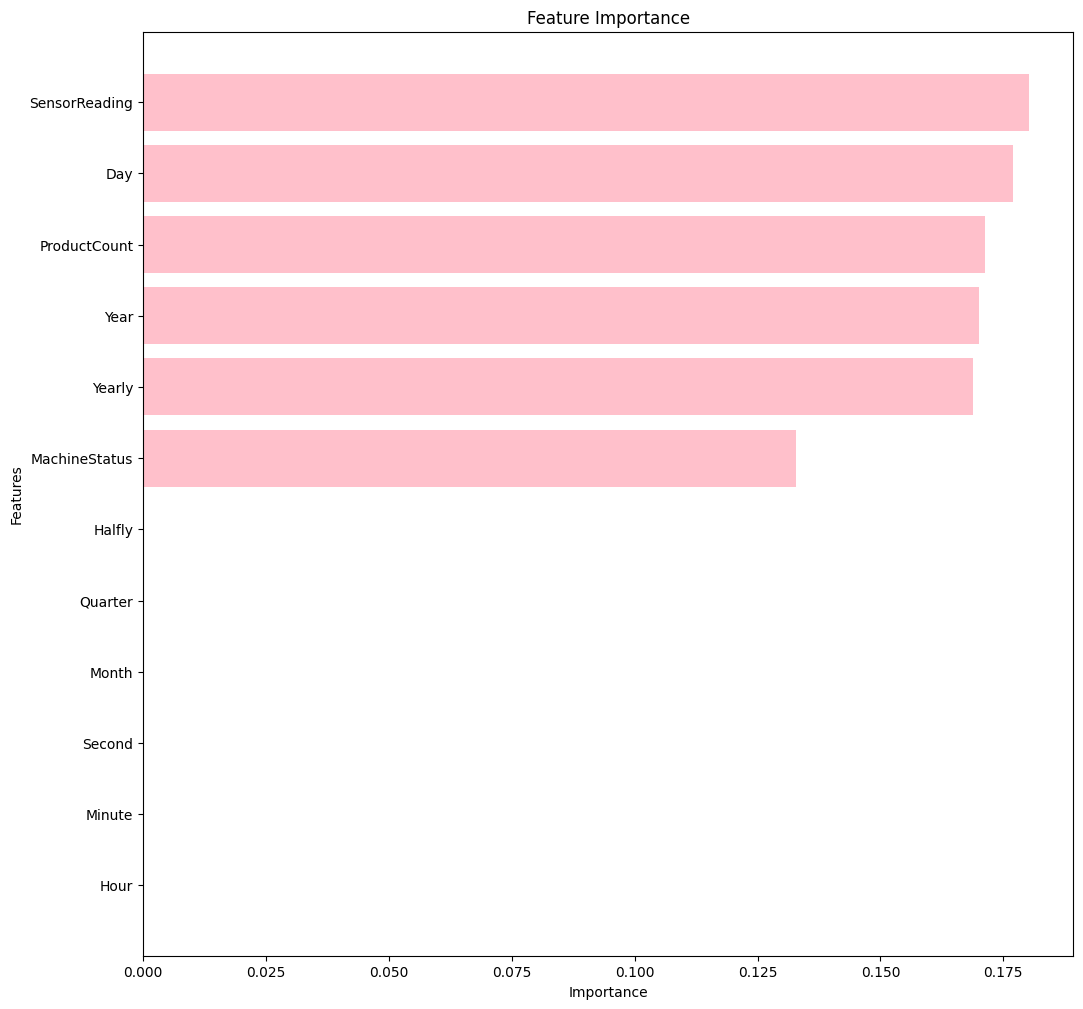

In [59]:
features_name = X_train.columns
importance = pipeline1.named_steps['xgb'].feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(12,12))
plt.barh(range(len(indices)),importance[indices],align='center',color="pink")
plt.yticks(range(len(indices)),[features_name[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [45]:
para_grid1 = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [0.1, 0.5, 1],
    'xgb__max_depth': [3, 4, 5],
    'xgb__subsample': [0.5,0.8,1],
    'xgb__colsample_bytree': [0.5,0.8,1],
    'xgb__gamma': [0, 0.1, 0.2],

}



In [61]:
grid_search1 = GridSearchCV(estimator=pipeline1, param_grid=para_grid1, cv=3, scoring='accuracy',n_jobs=-1)

In [62]:
grid_search1.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=No...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.5, 0.8, 1],
                         'xgb__gamma': [0, 0.1, 0.2],
                         'xgb__learning_rate': [0.1, 0.5, 1],
                         'xgb__max_depth': [3, 4, 5],
                         'xgb__n_estimators': [100, 200, 300],
                         'xgb__subsample': [0.5, 0.8, 1]},
             scoring='accuracy')

In [63]:
y_pred2=grid_search1.best_estimator_.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)
print("Classification Report")
print(classification_report(y_test, y_pred2))

Accuracy: 0.54
Classification Report
              precision    recall  f1-score   support

           0       0.53      0.51      0.52        98
           1       0.55      0.57      0.56       102

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200



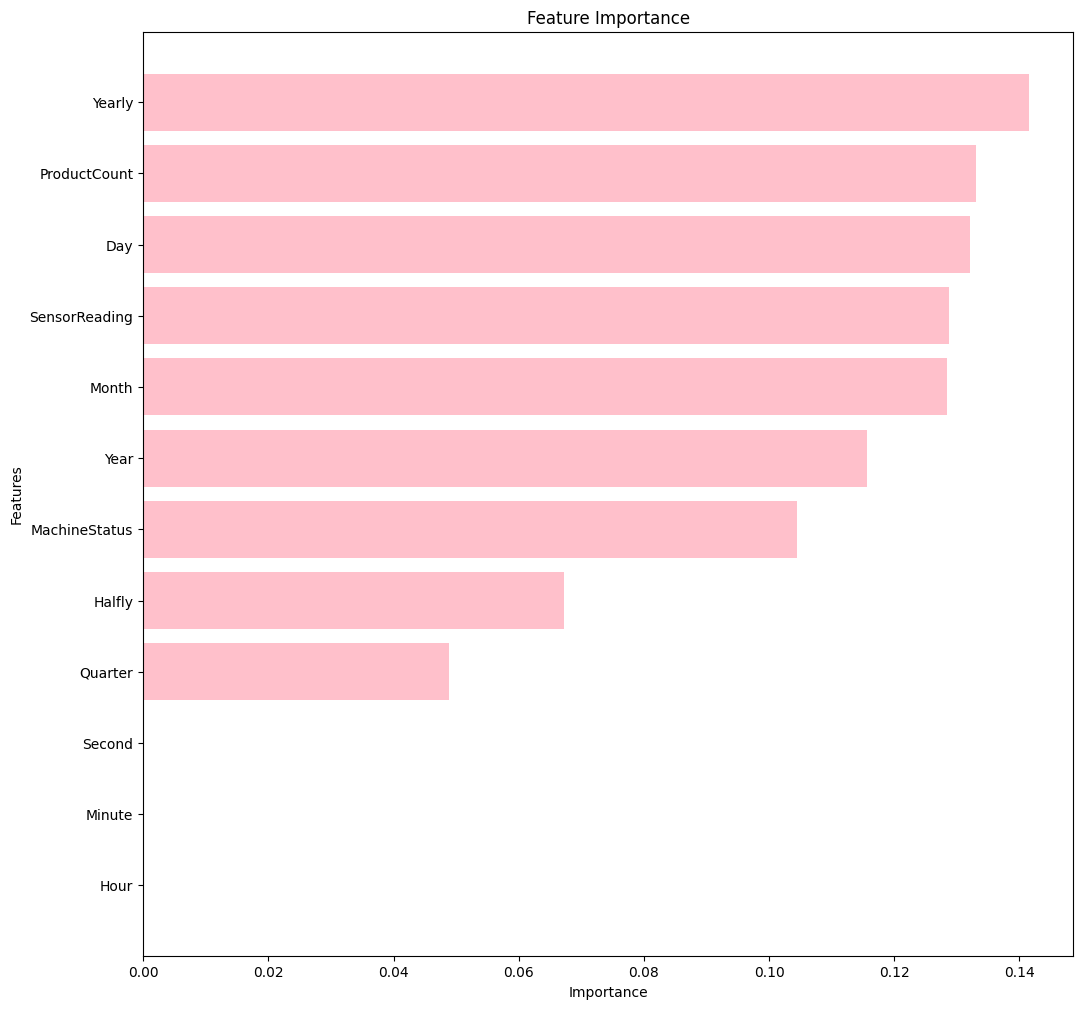

In [66]:
features_name = X_train.columns
importance = grid_search1.best_estimator_.named_steps['xgb'].feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(12,12))
plt.barh(range(len(indices)),importance[indices],align='center',color="pink")
plt.yticks(range(len(indices)),[features_name[i] for i in indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [76]:
train_accuracy = accuracy_score(y_train, grid_search1.best_estimator_.predict(X_train))
train_precision = precision_score(y_train, grid_search1.best_estimator_.predict(X_train)) # Changed y_test to y_train
train_recall = recall_score(y_train, grid_search1.best_estimator_.predict(X_train)) # Changed y_test to y_train and y_pred to grid_search.best_estimator_.predict(X_train)
train_f1 = f1_score(y_train, grid_search1.best_estimator_.predict(X_train)) # Changed y_test to y_train and y_pred to grid_search.best_estimator_.predict(X_train)
print("Train Accuracy:", train_accuracy)
print("Train Precision:", train_precision)
print("Train Recall:", train_recall)
print("Train F1 Score:", train_f1)

Train Accuracy: 0.94
Train Precision: 0.9421686746987952
Train Recall: 0.9421686746987952
Train F1 Score: 0.9421686746987952
